In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
import numpy as np

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
fig_dir  = os.path.join(proj_dir,'reports','figures')
int_dir = os.path.join(data_dir,'interim')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

In [16]:
sw_flux = xr.open_dataset(os.path.join(data_dir,'raw','waom_frc','waom10_swflux.nc')).swflux
grd = xr.open_dataset(os.path.join(data_dir,'raw','waom_frc','waom10_grd.nc'))

In [51]:
sw_flux

<xarray.DataArray 'swflux' (swf_time: 365, eta_rho: 530, xi_rho: 630)>
[121873500 values with dtype=float64]
Coordinates:
  * swf_time  (swf_time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  surface freshwater flux (E-P)
    negative:   net precipitation
    positive:   net evaporation
    units:      centimetre day-1

/home/ubuntu/bigStick/anaconda3/envs/xesmf_env/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


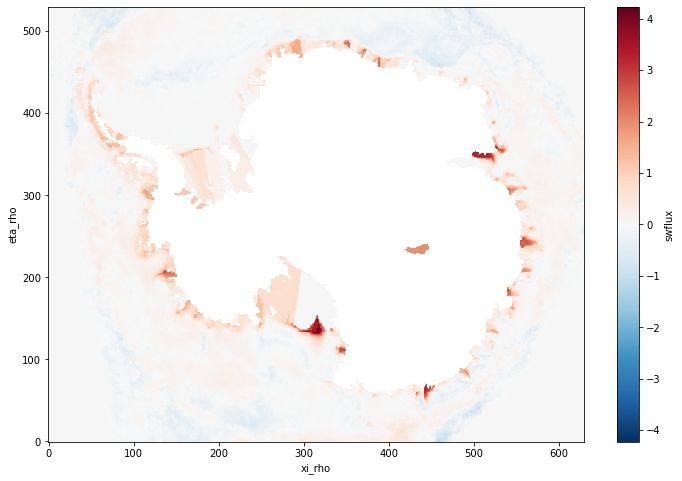

In [17]:
sw_flux.where(grd.mask_rho).mean('swf_time').plot(size=8)

In [19]:
nudge = xr.open_dataset(os.path.join(data_dir,'raw','waom_frc','waom10_nudge.nc'))
nudge

<xarray.Dataset>
Dimensions:   (eta_rho: 530, sss_time: 12, sst_time: 12, xi_rho: 630)
Coordinates:
  * sss_time  (sss_time) timedelta64[ns] 15 days 04:59:59.999971200 ... 349 d...
  * sst_time  (sst_time) timedelta64[ns] 15 days 04:59:59.999971200 ... 349 d...
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    SSS       (sss_time, eta_rho, xi_rho) float64 ...
    SST       (sst_time, eta_rho, xi_rho) float64 ...
    dQdSST    (sst_time, eta_rho, xi_rho) float64 ...

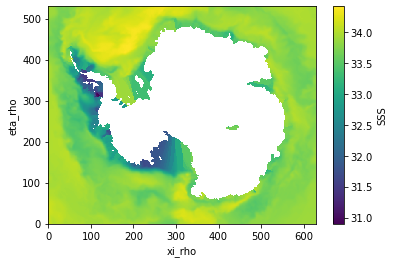

In [22]:
nudge.SSS.mean('sss_time').where(grd.mask_rho).plot()

/home/ubuntu/bigStick/anaconda3/envs/xesmf_env/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


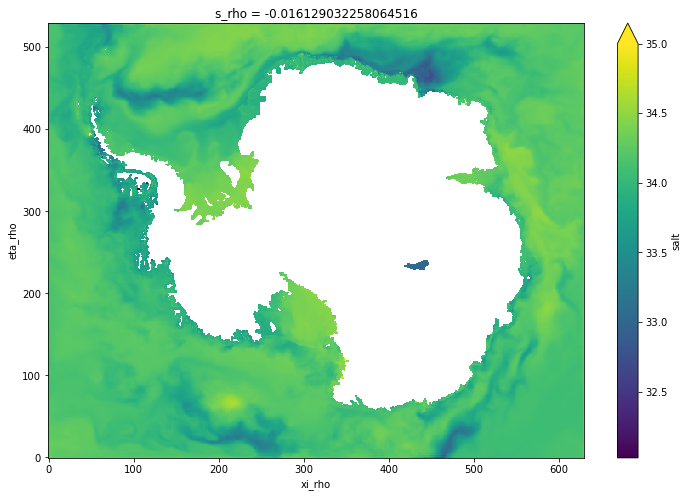

In [28]:
avg = xr.open_dataset(os.path.join(data_dir,'raw','waom10','ocean_avg_0009.nc'))
avg.salt[:,30].where(grd.mask_rho).mean('ocean_time').plot(size=8,vmax=35)

/home/ubuntu/bigStick/anaconda3/envs/xesmf_env/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


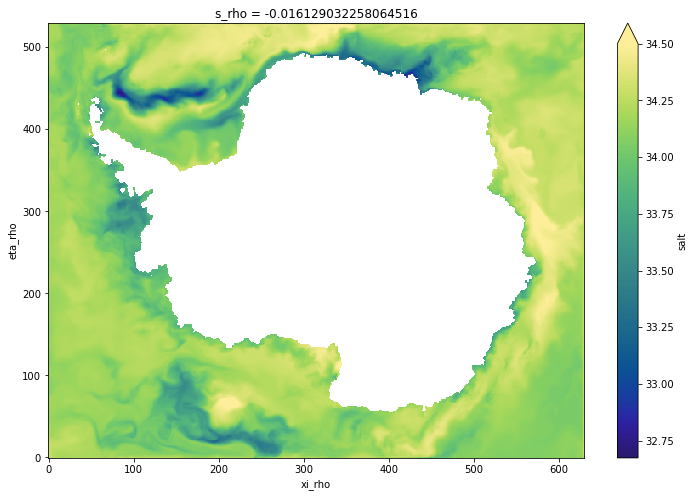

In [58]:
import cmocean.cm as ocm
avg.salt[:,30].where(grd.zice==0).groupby('ocean_time.season').mean('ocean_time')\
.sel(season=['MAM','JJA']).mean('season').plot(size=8,vmax=34.5,cmap=ocm.haline)